In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## path for datasets in google drive

In [ ]:
import os
path_to_plants = "/content/drive/MyDrive/datasets/plants"
plant_classes = os.listdir(path_to_plants)

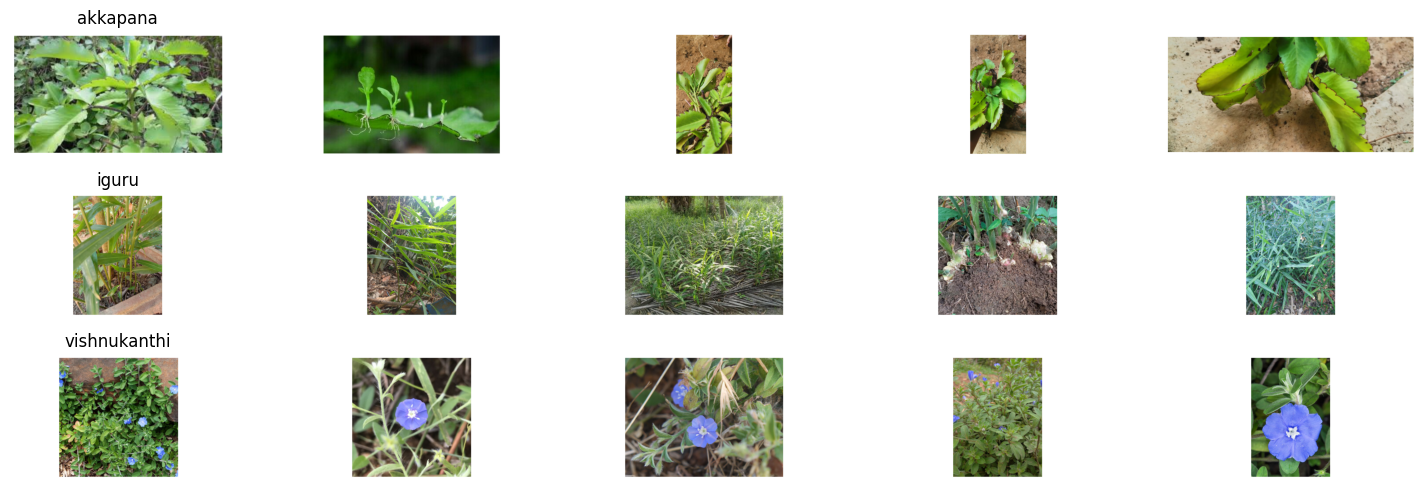

In [ ]:
import glob

import numpy as np
import matplotlib.pyplot as plt


import matplotlib.image as mpimg


# Number of samples to display per class
num_samples = 5

fig, axes = plt.subplots(len(plant_classes), num_samples, figsize=(15, 5))

for i, plant_class in enumerate(plant_classes):
    image_paths = glob.glob(os.path.join(path_to_plants, plant_class, "*.png"))
    sample_paths = np.random.choice(image_paths, num_samples, replace=False)

    for j, img_path in enumerate(sample_paths):
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(plant_class)

plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths for train and validation directories

train_dir = os.path.join(path_to_plants, 'train')
val_dir = os.path.join(path_to_plants, 'val')

# Create train and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Splitting ratio
test_size = 0.2

for plant_class in plant_classes:
    # Source directory for this class
    src_dir = os.path.join(path_to_plants, plant_class)

    # List all files in the directory
    all_files = os.listdir(src_dir)

    # Split files into training and validation sets
    train_files, val_files = train_test_split(all_files, test_size=test_size, random_state=42)


    # Destination directories for train and validation sets for this class
    train_dest_dir = os.path.join(train_dir, plant_class)
    val_dest_dir = os.path.join(val_dir, plant_class)

    os.makedirs(train_dest_dir, exist_ok=True)
    os.makedirs(val_dest_dir, exist_ok=True)

    # Move files to their respective directories
    for file in train_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(train_dest_dir, file))

    for file in val_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(val_dest_dir, file))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only normalization for validation
val_datagen = ImageDataGenerator(rescale=1./255)

input_size = (150, 150)
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 473 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


## CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
15/15 [==============================] - 24s 632ms/step - loss: 1.5373 - accuracy: 0.3721 - val_loss: 1.0102 - val_accuracy: 0.4500
Epoch 2/25
15/15 [==============================] - 9s 623ms/step - loss: 0.8945 - accuracy: 0.5772 - val_loss: 0.7256 - val_accuracy: 0.6750
Epoch 3/25
15/15 [==============================] - 8s 507ms/step - loss: 0.7034 - accuracy: 0.6808 - val_loss: 0.5861 - val_accuracy: 0.7750
Epoch 4/25
15/15 [==============================] - 9s 598ms/step - loss: 0.6297 - accuracy: 0.7505 - val_loss: 0.5880 - val_accuracy: 0.7833
Epoch 5/25
15/15 [==============================] - 8s 537ms/step - loss: 0.5095 - accuracy: 0.7992 - val_loss: 0.4187 - val_accuracy: 0.8167
Epoch 6/25
15/15 [==============================] - 8s 508ms/step - loss: 0.4909 - accuracy: 0.8182 - val_loss: 0.3652 - val_accuracy: 0.8917
Epoch 7/25
15/15 [==============================] - 9s 632ms/step - loss: 0.4855 - accuracy: 0.8118 - val_loss: 0.6862 - val_accuracy: 0.6750
Epoch

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)

4/4 [==============================] - 1s 267ms/step - loss: 0.2689 - accuracy: 0.9000
Validation Accuracy: 0.8999999761581421


# training model -01

### epoch = 50

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
15/15 [==============================] - 9s 630ms/step - loss: 0.2268 - accuracy: 0.9197 - val_loss: 0.2927 - val_accuracy: 0.8750
Epoch 2/50
15/15 [==============================] - 8s 517ms/step - loss: 0.1721 - accuracy: 0.9408 - val_loss: 0.3115 - val_accuracy: 0.8833
Epoch 3/50
15/15 [==============================] - 9s 569ms/step - loss: 0.2459 - accuracy: 0.9197 - val_loss: 0.2702 - val_accuracy: 0.9083
Epoch 4/50
15/15 [==============================] - 9s 605ms/step - loss: 0.1688 - accuracy: 0.9408 - val_loss: 0.3381 - val_accuracy: 0.9000
Epoch 5/50
15/15 [==============================] - 8s 513ms/step - loss: 0.1771 - accuracy: 0.9260 - val_loss: 0.1849 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 9s 598ms/step - loss: 0.2334 - accuracy: 0.9133 - val_loss: 0.2913 - val_accuracy: 0.8750
Epoch 7/50
15/15 [==============================] - 10s 693ms/step - loss: 0.1792 - accuracy: 0.9197 - val_loss: 0.1977 - val_accuracy: 0.9333
Epoch

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)

4/4 [==============================] - 1s 266ms/step - loss: 0.7460 - accuracy: 0.6667
Validation Accuracy: 0.6666666865348816


# Traning model

## epochs = 100

In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)

Epoch 1/100
15/15 [==============================] - 9s 619ms/step - loss: 0.5358 - accuracy: 0.7928 - val_loss: 0.3621 - val_accuracy: 0.8333
Epoch 2/100
15/15 [==============================] - 10s 651ms/step - loss: 0.3202 - accuracy: 0.8943 - val_loss: 0.4004 - val_accuracy: 0.8417
Epoch 3/100
15/15 [==============================] - 7s 497ms/step - loss: 0.2705 - accuracy: 0.8985 - val_loss: 0.3243 - val_accuracy: 0.9083
Epoch 4/100
15/15 [==============================] - 9s 601ms/step - loss: 0.2429 - accuracy: 0.9027 - val_loss: 0.1565 - val_accuracy: 0.9333
Epoch 5/100
15/15 [==============================] - 8s 530ms/step - loss: 0.2384 - accuracy: 0.9070 - val_loss: 0.5706 - val_accuracy: 0.8250
Epoch 6/100
15/15 [==============================] - 10s 626ms/step - loss: 0.3201 - accuracy: 0.8795 - val_loss: 0.3690 - val_accuracy: 0.8833
Epoch 7/100
15/15 [==============================] - 10s 682ms/step - loss: 0.2357 - accuracy: 0.9049 - val_loss: 0.2985 - val_accuracy: 0.8

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)

4/4 [==============================] - 1s 325ms/step - loss: 0.3784 - accuracy: 0.9167
Validation Accuracy: 0.9166666865348816
